# Supervised Learning

In this notebook, we will cover:
1. **Learning models** and **features**.
2. **Supervised learning**: classification vs. regression.
3. **Generalization**, **overfitting**, and **underfitting**.
4. Relation of **model complexity** to **dataset size**.
5. A **Python example** of a supervised learning task.


## 1. Introduction
Supervised Learning is a branch of machine learning where we have **labeled data** (i.e., data points with known target/labels) and we want to train models to predict these targets for new data. There are two main flavors of supervised learning:
- **Classification**: Predicting discrete labels (e.g., spam vs. not spam).
- **Regression**: Predicting continuous values (e.g., house price).


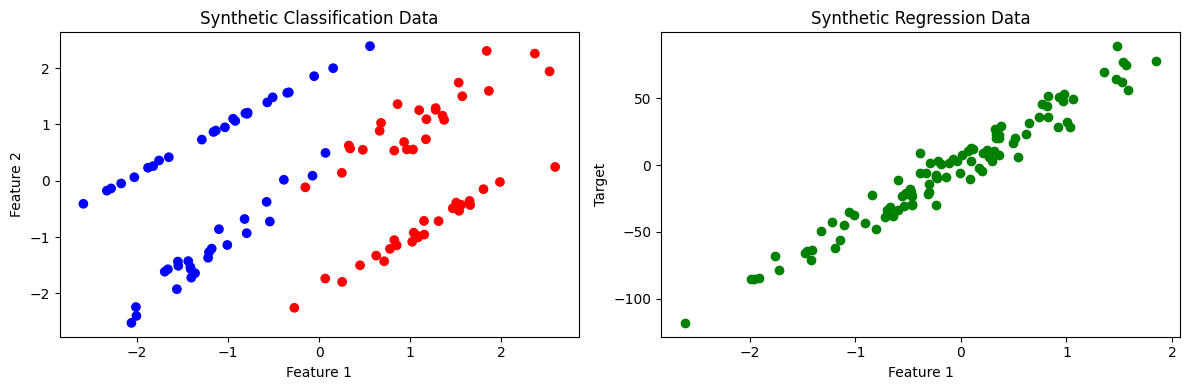

In [ ]:
# Example: let's show a quick classification vs. regression demonstration.
# We'll use scikit-learn's 'make_classification' and 'make_regression' to generate synthetic data.

from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Classification data
X_class, y_class = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=42)
# 2. Regression data
X_reg, y_reg = make_regression(n_features=1, n_informative=1, noise=10, random_state=42)

# Let's plot them side by side.
plt.figure(figsize=(12, 4))

# Classification plot
plt.subplot(1, 2, 1)
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='bwr')
plt.title("Synthetic Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Regression plot
plt.subplot(1, 2, 2)
plt.scatter(X_reg, y_reg, color='green')
plt.title("Synthetic Regression Data")
plt.xlabel("Feature 1")
plt.ylabel("Target")

plt.tight_layout()
plt.show()

# This gives a quick visualization of classification vs regression tasks.

In [ ]:
y_reg

array([  50.77992943,  -10.06527016,  -34.91839191,   10.52674299,
        -17.73837724,   31.56459551,  -30.06888275,    5.91200699,
         23.47337416,   32.34359474,   35.76573341,   76.88323383,
         36.18776792,    2.9244734 ,  -47.81146525,   12.61693126,
        -85.45418019,   20.05162924,   28.63464002, -118.02745409,
         16.77823077,    2.81079984,  -29.36593416,   28.57973536,
         74.71530364,   64.57600193,  -11.01926675,    2.74944415,
        -33.92230425,  -62.09952962,   20.28587171,   29.52220586,
          5.76708113,  -21.69297316,  -43.6490161 ,   -4.01153077,
        -20.19870331,    7.58329135,   51.39997923,    1.74763946,
         22.78482382,  -31.5003787 ,   61.91233294,  -20.69551487,
         -7.6244312 ,   -5.91131407,  -14.17777333,  -38.23228892,
         23.49423306,    8.80963973,   -5.90648058,    7.31453371,
        -29.99628354,   89.03314517,    9.31786907,   24.7816116 ,
         20.00370858,    0.72440436,   -8.86713635,  -85.35925

### 1.1 Learning Models
A **model** in machine learning maps input features x to a prediction y. The model's internal parameters are adjusted during the training phase to minimize errors on the training data.

### 1.2 Features
Features are the input variables used by the model. **Feature engineering** can be critical for improving model performance. Examples:
- Pixel intensities in an image.
- Terms/frequencies in a text document.
- Statistical measures (mean, variance, etc.) or domain-specific transformations.


Trained model coefficients:
Slope: [[2.6214757]]
Intercept: [31.21175765]

Predictions: [[ 39.07618476]
 [ 57.4265147 ]
 [ 83.64127175]
 [109.85602879]]
Actual y values: [[ 20]
 [ 80]
 [ 90]
 [100]]


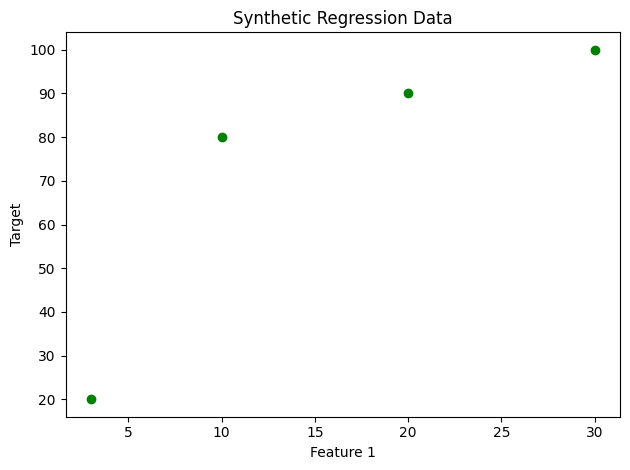

array([[44.31913617]])

In [ ]:
# Example: We'll create a 'model' that demonstrates a simple feature mapping.
# For demonstration, let's pretend we have a single feature x and we model y = 2x + 3.
# Then we'll 'train' by simply fitting a line.

import numpy as np
from sklearn.linear_model import LinearRegression

# Synthetic feature data
X_feat = np.array([[1], [2], [3], [4], [5]])  # 5 data points
y_feat = 2 * X_feat[:, 0] + 3  # y = 2x + 3
# Synthetic feature data
X_feat = np.array([[3],[10], [20], [30]])  # 5 data points
y_feat = np.array([[20], [80], [90], [100]])
model = LinearRegression()
model.fit(X_feat, y_feat)

print("Trained model coefficients:")
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

# We'll predict on X_feat
predictions = model.predict(X_feat)
print("\nPredictions:", predictions)
print("Actual y values:", y_feat)
plt.scatter(X_feat, y_feat, color='green')
plt.title("Synthetic Regression Data")
plt.xlabel("Feature 1")
plt.ylabel("Target")

plt.tight_layout()
plt.show()
model.predict([[5]])

## 2. Supervised Learning Overview
1. We have training data of the form \((x_i, y_i)\) for \(i = 1, ..., N\).
2. A learning algorithm tries to learn a function \(f\) such that \(f(x_i) ≈ y_i\) for the training set.
3. For **classification** tasks, \(y_i\) is typically a discrete label.
4. For **regression** tasks, \(y_i\) is a continuous variable.

After training, we evaluate how well the model generalizes to new, unseen data.

In [ ]:
# Example: Let's do a quick train/test split to see how a model generalizes.
from sklearn.model_selection import train_test_split

# We'll use the regression data from before (X_reg, y_reg)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

train_score = reg_model.score(X_train, y_train)  # R^2 on training
test_score = reg_model.score(X_test, y_test)    # R^2 on testing

print(f"Train R^2: {train_score:.3f}")
print(f"Test R^2:  {test_score:.3f}")
print("\nNote: Test score is how well the model generalizes to unseen data.")

Train R^2: 0.957
Test R^2:  0.941

Note: Test score is how well the model generalizes to unseen data.


## 3. Classification vs. Regression

### 3.1 Classification
Examples:
- Email spam detection (spam/not spam)
- Image recognition (cat/dog/car/etc.)
- Sentiment analysis (positive/negative)

Some popular classification algorithms:
- Logistic Regression
- Support Vector Machines (SVM)
- Decision Trees/Random Forests
- Neural Networks

Metrics often used:
- Accuracy, Precision, Recall
- F1 Score
- ROC AUC

### 3.2 Regression
Examples:
- Predicting house prices
- Forecasting stock prices
- Estimating a person's height from genetics

Some popular regression algorithms:
- Linear Regression
- Ridge/Lasso Regression
- Random Forest Regressors
- Neural Networks (for continuous outputs)

Metrics often used:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R^2 Score

In [ ]:
# Example: We'll show a classification model (Logistic Regression) on the synthetic classification data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# We'll reuse X_class, y_class from above.
# Split into train/test.
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(Xc_train, yc_train)

preds = clf.predict(Xc_test)
acc = accuracy_score(yc_test, preds)
cla = classification_report(yc_test, preds)

print("Classification Report:\n", cla)
print("Logistic Regression Classification Accuracy:", acc)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Logistic Regression Classification Accuracy: 0.9666666666666667
Coefficients: [[ 2.92819624 -0.64349214]]
Intercept: [0.16207759]


In [ ]:
yc_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1])

## 4. Generalization, Overfitting, and Underfitting

### 4.1 Generalization
A model **generalizes** well if it performs well on **unseen test data** or data drawn from the same distribution as the training data.

### 4.2 Overfitting
Overfitting occurs when a model becomes too complex and "memorizes" the training data, capturing noise rather than the underlying relationship. Signs:
- Very low error on training data.
- Poor performance on validation/test data.

**Causes** of overfitting:
- Model is too complex relative to the amount of data.
- Not enough regularization (penalty on large weights, complexity, etc.).

**Solutions**:
- Simplify the model (reduce parameters, reduce depth).
- Collect more data (if possible).
- Use regularization (L2, dropout, early stopping).
- Use cross-validation to tune hyperparameters.

### 4.3 Underfitting
Underfitting occurs when a model is too simple to capture the relationship in the data. Signs:
- High error on training data.
- High error on test data.

**Causes** of underfitting:
- Model is too simple relative to the complexity of the data.
- Not enough relevant features.
- Not enough training time or suboptimal hyperparameters.

**Solutions**:
- Increase model complexity (more parameters, deeper network, etc.).
- Add more or better features.
- Decrease regularization.


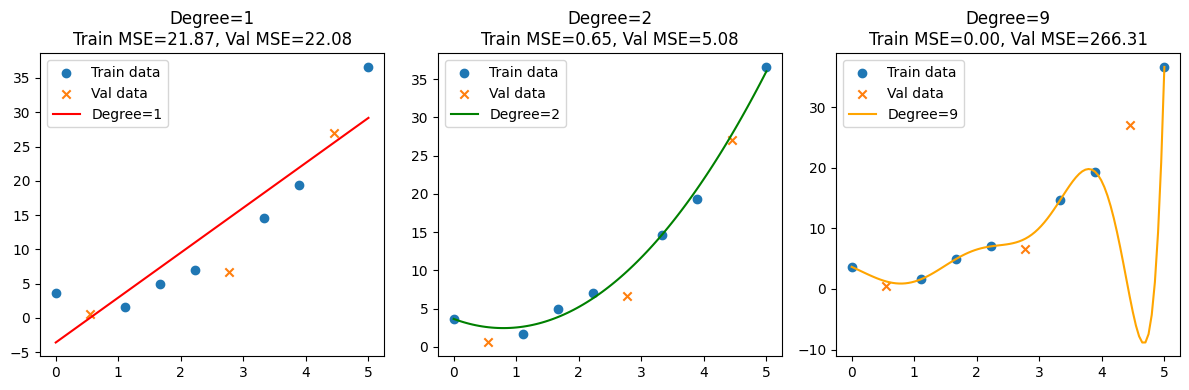

In [ ]:
# Example: We'll demonstrate overfitting vs. underfitting with polynomial regression.
# We'll generate a small dataset that's roughly quadratic and then fit polynomial models of different degrees.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Generate data
np.random.seed(0)
X_over = np.linspace(0, 5, 10).reshape(-1, 1)
y_over = 2 * X_over.ravel()**2 - 3 * X_over.ravel() + 1 + np.random.randn(10) * 1.5

# Train/validation split
Xo_train, Xo_val, yo_train, yo_val = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

degrees = [1, 2, 9]  # linear, good, overfit
colors = ['red', 'green', 'orange']

plt.figure(figsize=(12, 4))
for i, d in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=d)),
        ("lin_reg", LinearRegression())
    ])
    model.fit(Xo_train, yo_train)
    y_pred_train = model.predict(Xo_train)
    y_pred_val = model.predict(Xo_val)
    train_mse = mean_squared_error(yo_train, y_pred_train)
    val_mse = mean_squared_error(yo_val, y_pred_val)

    # Plot training data and predictions
    plt.scatter(Xo_train, yo_train, label="Train data")
    plt.scatter(Xo_val, yo_val, label="Val data", marker='x')

    # Dense points for smoother curve
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=colors[i], label=f"Degree={d}")
    plt.title(f"Degree={d}\nTrain MSE={train_mse:.2f}, Val MSE={val_mse:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()

# This visually demonstrates how a low-degree polynomial might underfit (degree=1)
# and a high-degree polynomial might overfit (degree=9).

## 5. Relation of Model Complexity to Dataset Size
1. **Small dataset** + **highly complex model** → risk of **overfitting**.
2. **Large dataset** + **simple model** → risk of **underfitting**.

Generally, to successfully train more complex models, you need **more data**. The ideal balance is to match the model complexity with the dataset size and variability. Techniques like **cross-validation** and learning curves help identify if you're over or underfitting.

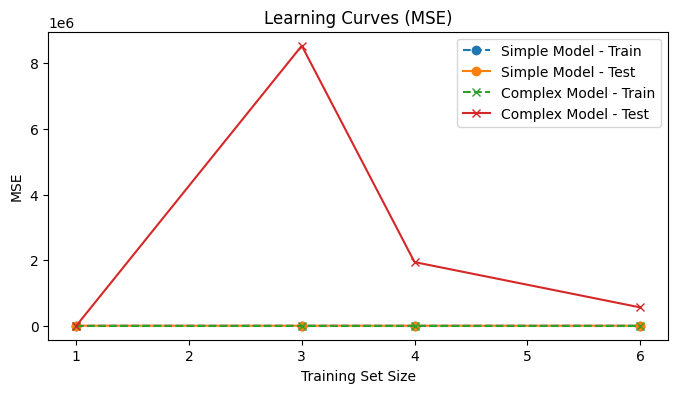

In [ ]:
# Example: We'll show a learning curve demonstration using scikit-learn's learning_curve function.
from sklearn.model_selection import learning_curve

model_simple = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1)),  # linear
    ("lin_reg", LinearRegression())
])

model_complex = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5)),  # more complex
    ("lin_reg", LinearRegression())
])

train_sizes, train_scores_s, test_scores_s = learning_curve(
    model_simple, X_over, y_over, cv=3, scoring='neg_mean_squared_error', train_sizes=[0.2, 0.5, 0.8, 1.0])

train_sizes, train_scores_c, test_scores_c = learning_curve(
    model_complex, X_over, y_over, cv=3, scoring='neg_mean_squared_error', train_sizes=[0.2, 0.5, 0.8, 1.0])

# Average over folds
train_mean_s = -np.mean(train_scores_s, axis=1)
test_mean_s = -np.mean(test_scores_s, axis=1)
train_mean_c = -np.mean(train_scores_c, axis=1)
test_mean_c = -np.mean(test_scores_c, axis=1)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_mean_s, 'o--', label="Simple Model - Train")
plt.plot(train_sizes, test_mean_s, 'o-', label="Simple Model - Test")
plt.plot(train_sizes, train_mean_c, 'x--', label="Complex Model - Train")
plt.plot(train_sizes, test_mean_c, 'x-', label="Complex Model - Test")
plt.title("Learning Curves (MSE)")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Notice how the complex model might have lower training error but higher variance on small data.
# As we increase the training size, the difference might get smaller (depending on the data).

## 6. Python Example
Let's do a quick demonstration using a small synthetic dataset. We'll:
1. Generate some data.
2. Perform a **regression** using **LinearRegression**.
3. Show how **overfitting** might happen if we use a more complex model (e.g., polynomial features) without enough data.

> **Note**: In practice, you'd use train/test splits, cross-validation, etc.

Linear MSE: 18.13
Polynomial (degree=2) MSE: 2.17


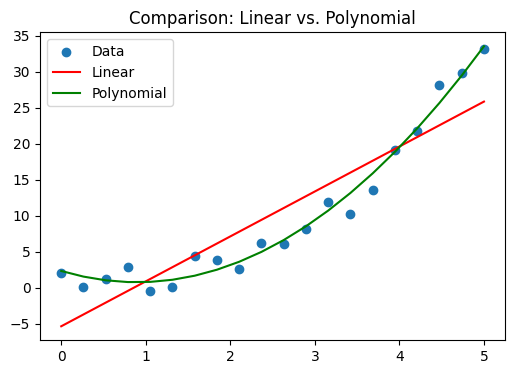

In [ ]:
# We already showed a polynomial regression example above.
# Let's consolidate a final example from scratch.

# 1. Generate data
np.random.seed(42)
X_final = np.linspace(0, 5, 20).reshape(-1, 1)
y_final = 2.0 * X_final.ravel()**2 - 3.0 * X_final.ravel() + 1.0 + np.random.randn(20) * 2.0

# 2. Perform a linear regression and a polynomial regression.
lin_reg_final = LinearRegression()
lin_reg_final.fit(X_final, y_final)
y_lin_pred = lin_reg_final.predict(X_final)

poly_model_final = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

poly_model_final.fit(X_final, y_final)
y_poly_pred = poly_model_final.predict(X_final)

# 3. Compare MSE
mse_lin_final = mean_squared_error(y_final, y_lin_pred)
mse_poly_final = mean_squared_error(y_final, y_poly_pred)

print(f"Linear MSE: {mse_lin_final:.2f}")
print(f"Polynomial (degree=2) MSE: {mse_poly_final:.2f}")

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X_final, y_final, label="Data")
plt.plot(X_final, y_lin_pred, color="red", label="Linear")
plt.plot(X_final, y_poly_pred, color="green", label="Polynomial")
plt.legend()
plt.title("Comparison: Linear vs. Polynomial")
plt.show()

In [ ]:

 2.0 * X_final**2 - 3.0 * X_final + 1.0 + np.random.randn(20) * 2.0

array([[ 2.47693316e+00,  1.34273656e+00,  7.68703435e-01,
         3.97792609e-01, -1.95704398e+00, -4.39688417e-01,
         7.87224581e-02,  3.11424445e+00,  1.68723658e+00,
        -2.52608031e+00,  1.64816794e+00,  2.29835439e-01,
        -3.53844001e-01,  2.22335258e+00,  3.06199904e+00,
         2.86256024e+00, -6.78435046e-01,  3.81575248e-01,
         1.66252686e+00,  2.95109025e+00],
       [ 1.82596363e+00,  6.91767033e-01,  1.17733906e-01,
        -2.53176920e-01, -2.60801351e+00, -1.09065795e+00,
        -5.72247071e-01,  2.46327492e+00,  1.03626705e+00,
        -3.17704984e+00,  9.97198410e-01, -4.21134090e-01,
        -1.00481353e+00,  1.57238305e+00,  2.41102952e+00,
         2.21159071e+00, -1.32940458e+00, -2.69394281e-01,
         1.01155733e+00,  2.30012073e+00],
       [ 1.45200241e+00,  3.17805814e-01, -2.56227313e-01,
        -6.27138139e-01, -2.98197473e+00, -1.46461916e+00,
        -9.46208290e-01,  2.08931370e+00,  6.62305831e-01,
        -3.55101106e+00,  6.2

In [ ]:
 2.0 * X_final**2

array([[ 0.        ],
       [ 0.13850416],
       [ 0.55401662],
       [ 1.2465374 ],
       [ 2.21606648],
       [ 3.46260388],
       [ 4.98614958],
       [ 6.7867036 ],
       [ 8.86426593],
       [11.21883657],
       [13.85041551],
       [16.75900277],
       [19.94459834],
       [23.40720222],
       [27.1468144 ],
       [31.1634349 ],
       [35.45706371],
       [40.02770083],
       [44.87534626],
       [50.        ]])

## 7. Summary
In this **1 hour 45-minute** session on Supervised Learning, we covered:
1. **Learning models and features**.
2. The distinction between **classification** (discrete targets) and **regression** (continuous targets).
3. The concepts of **generalization**, **overfitting**, **underfitting**, and how to address them.
4. The relation of **model complexity** to the **size of the dataset**.
5. A **Python example** demonstrating linear vs. polynomial regression and the risk of overfitting.

### Key Takeaways
- Always **split data** into training and validation/test sets (or use cross-validation) to check for over/underfitting.
- **Simpler models** may underfit, but are less prone to overfitting.
- **More complex models** can reduce bias but risk overfitting without enough data.
- Use **regularization** and **model selection** techniques to find the sweet spot.


In [ ]:
# Example: Just a final message to recap.
print("End of the Supervised Learning session. Review the concepts and experiment further!")

## 8. Further Reading
- [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Machine Learning Mastery on Overfitting vs. Underfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)
- Andrew Ng's [ML Coursera Course](https://www.coursera.org/learn/machine-learning)
- [ESL (Elements of Statistical Learning)](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

Thank you for exploring this notebook. Continue practicing these techniques on real-world data to deepen your understanding!